# Challenge: Model Comparison

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
import statsmodels.formula.api as smf

In [2]:
kickstarter_data = pd.read_csv('kickstarter_2018.csv')

In [3]:
kickstarter_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,failed,0,GB,0.000,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,failed,15,US,100.000,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,failed,3,US,220.000,220.000,45000.000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17 03:24:11,1.000,failed,1,US,1.000,1.000,5000.000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04 08:35:03,1283.000,canceled,14,US,1283.000,1283.000,19500.000


In [4]:
kickstarter_data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.000,378661.000,378661.000,378661.000,374864.000,378661.000,378661.000
mean,1074731191.989,49080.792,9682.979,105.617,7036.729,9058.924,45454.401
std,619086204.323,1183391.259,95636.010,907.185,78639.745,90973.343,1152950.055
min,5971.000,0.010,0.000,0.000,0.000,0.000,0.010
25%,538263516.000,2000.000,30.000,2.000,16.980,31.000,2000.000
50%,1075275634.000,5200.000,620.000,12.000,394.720,624.330,5500.000
75%,1610148624.000,16000.000,4076.000,56.000,3034.090,4050.000,15500.000
max,2147476221.000,100000000.000,20338986.270,219382.000,20338986.270,20338986.270,166361390.710


In [5]:
kickstarter_data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.000,378661.000,378661.000,378661.000,374864.000,378661.000,378661.000
mean,1074731191.989,49080.792,9682.979,105.617,7036.729,9058.924,45454.401
std,619086204.323,1183391.259,95636.010,907.185,78639.745,90973.343,1152950.055
min,5971.000,0.010,0.000,0.000,0.000,0.000,0.010
25%,538263516.000,2000.000,30.000,2.000,16.980,31.000,2000.000
50%,1075275634.000,5200.000,620.000,12.000,394.720,624.330,5500.000
75%,1610148624.000,16000.000,4076.000,56.000,3034.090,4050.000,15500.000
max,2147476221.000,100000000.000,20338986.270,219382.000,20338986.270,20338986.270,166361390.710


In [6]:
kickstarter_data['state'] = kickstarter_data['state'].apply(lambda x: 1 if x == 'successful' else 0 )

In [7]:
new_ks_data = kickstarter_data[kickstarter_data['pledged']< kickstarter_data['pledged'].quantile(0.95)]

My goal is to get an estimate of what a kickstarter's pledges are based on which is the goal, the number of backers and whether the kickstarter was succesful.

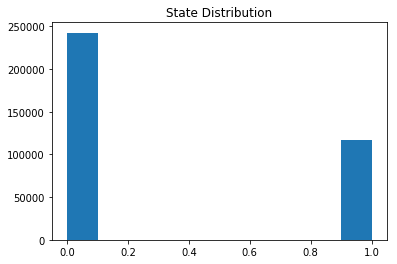

In [10]:
# This graph shows that our data shows nearly double the unsuccessful kickstarter campaigns as there is successful ones. 
plt.hist(new_ks_data['state'])
plt.title('State Distribution');

In [11]:
success_data = new_ks_data[new_ks_data['state'] == 1]
fail_data = new_ks_data[new_ks_data['state'] == 0]

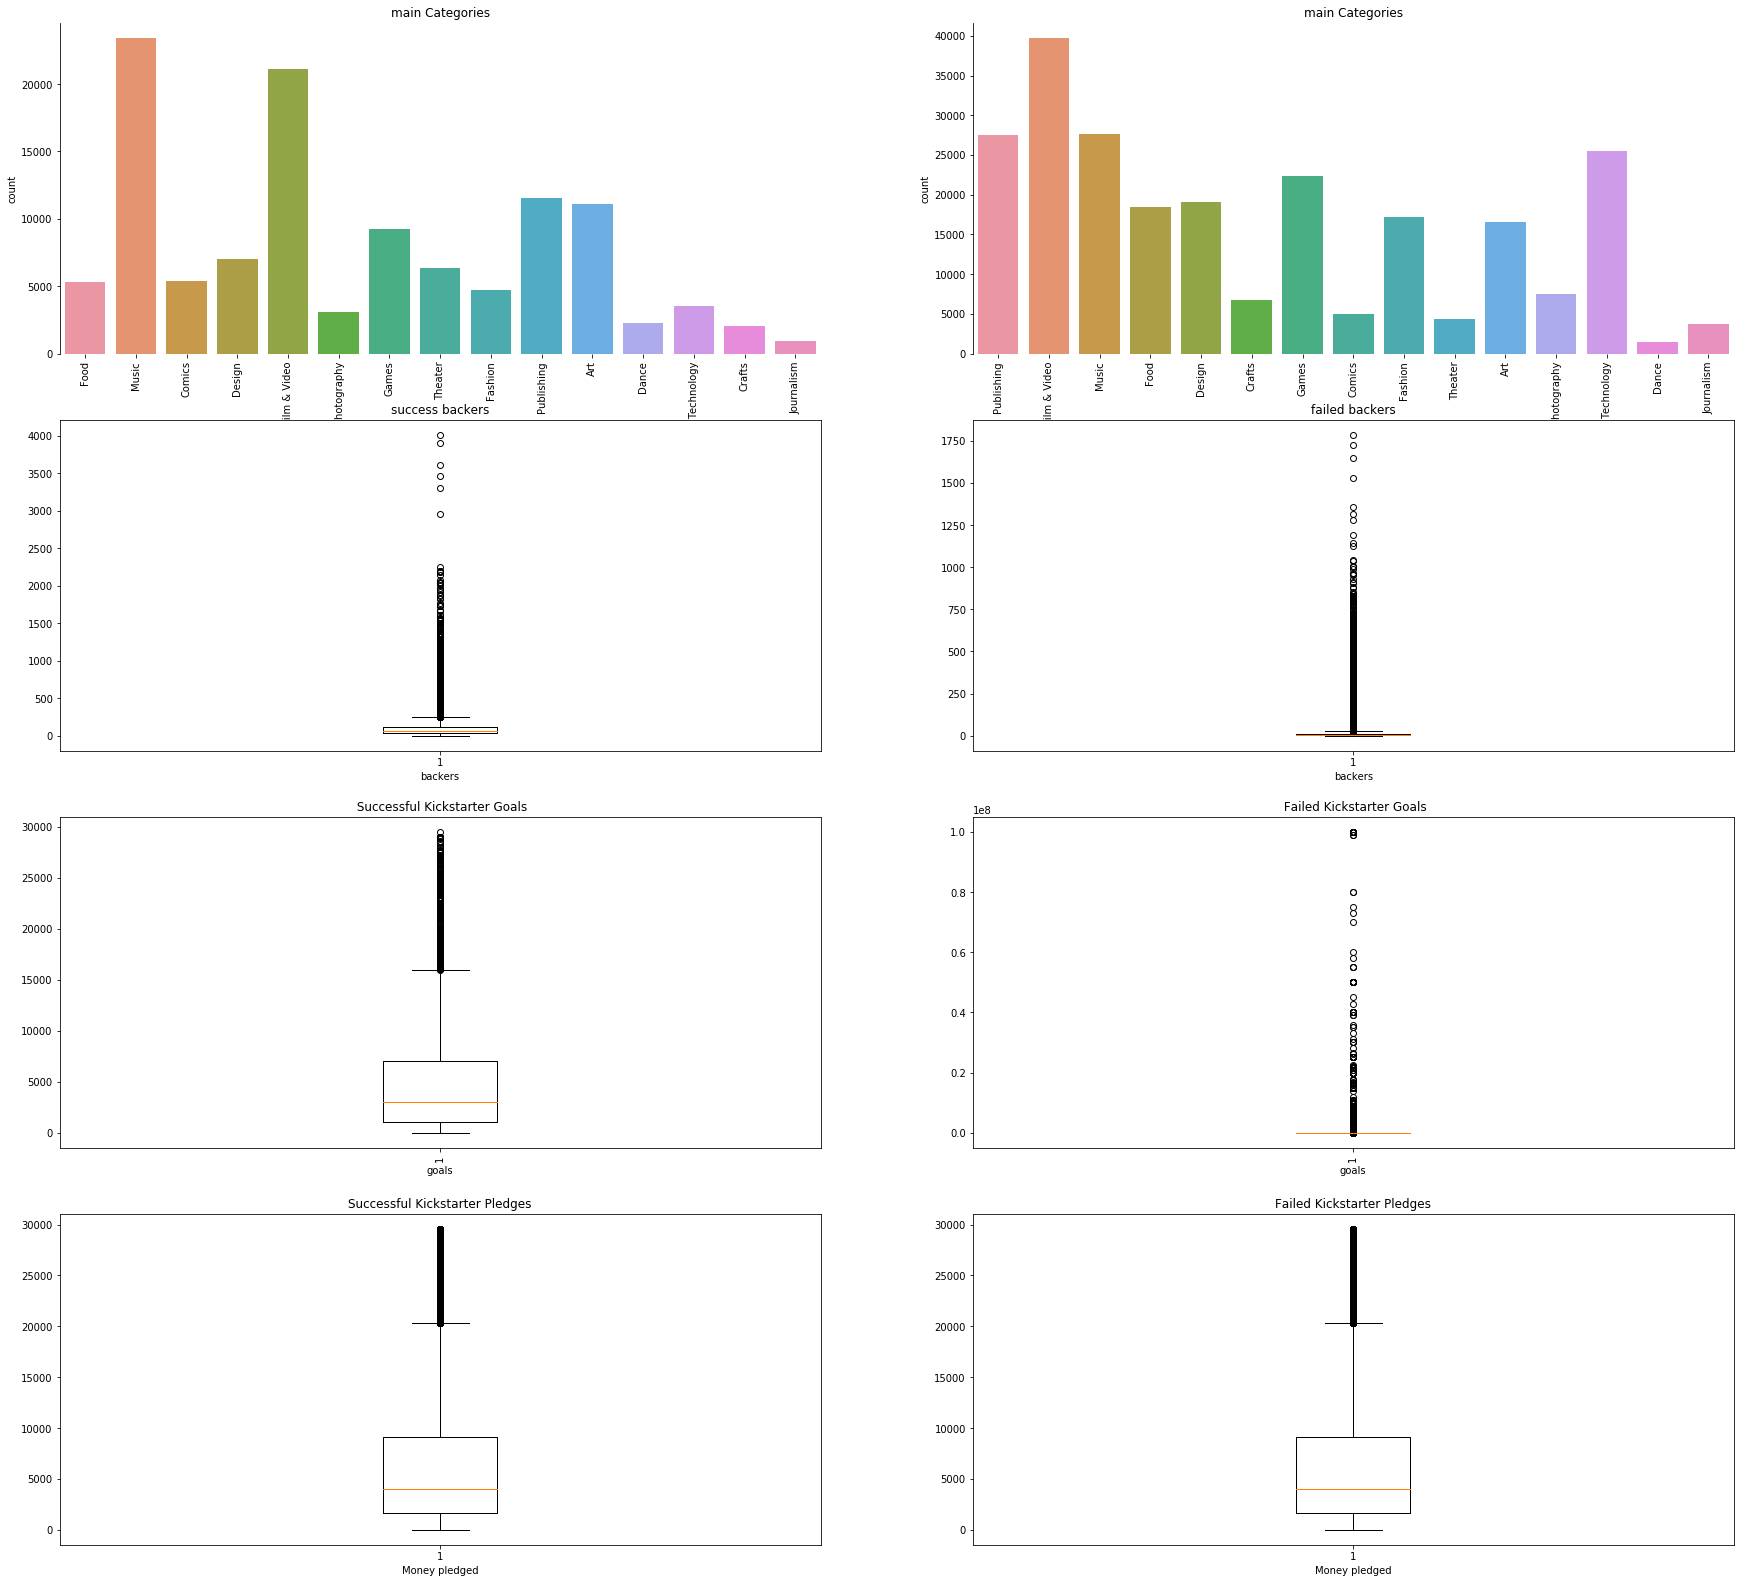

In [12]:
plt.figure(figsize=(30, 28))
plt.subplot(4, 2, 1)
sns.countplot(success_data['main_category'])
plt.title('main Categories')
plt.xlabel("Kickstarter successes in each category")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(4, 2, 2)
sns.countplot(fail_data['main_category'])
plt.title('main Categories')
plt.xlabel("Kickstarter nonsuccesses in each category")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(4, 2, 3)
plt.boxplot(success_data['backers'])
plt.title('success backers')
plt.xlabel("backers")

plt.subplot(4, 2, 4)
plt.boxplot(fail_data['backers'])
plt.title('failed backers')
plt.xlabel("backers")

plt.subplot(4, 2, 5)
plt.boxplot(success_data['goal'])
plt.title(" Successful Kickstarter Goals")
plt.xlabel("goals")
plt.xticks(rotation = 90)

plt.subplot(4, 2, 6)
plt.boxplot(fail_data['goal'])
plt.title(" Failed Kickstarter Goals")
plt.xlabel("goals")
plt.xticks(rotation = 90)

plt.subplot(4, 2, 7)
plt.boxplot(success_data['pledged'])
plt.title('Successful Kickstarter Pledges')
plt.xlabel("Money pledged")

plt.subplot(4, 2, 8)
plt.boxplot(success_data['pledged'])
plt.title('Failed Kickstarter Pledges')
plt.xlabel("Money pledged")

plt.show()

## KNN Model

In [13]:
X = new_ks_data[["goal", "state", 'backers']]
y = new_ks_data['pledged']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
result = []
    
for i in range(1, 20):
    best_k = 0
    best_acc = 0
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    x = score.mean()
    if x > best_acc:
        best_k += i
        best_acc += x
    result.append([best_k, best_acc])
     
print(result)

[[1, 0.68884648857016628], [2, 0.75737248737488272], [3, 0.77599084297177989], [4, 0.78489572182176226], [5, 0.78972226240108312], [6, 0.79261720793392842], [7, 0.79391169075680668], [8, 0.79427209792214204], [9, 0.794357728493155], [10, 0.79366989447535308], [11, 0.79314196336354625], [12, 0.79222770990129687], [13, 0.79148328621926445], [14, 0.79086447700036355], [15, 0.7900919440955636], [16, 0.78927196249448461], [17, 0.78824557816429119], [18, 0.78727070424398682], [19, 0.78642081481103221]]


In [34]:
knn = neighbors.KNeighborsRegressor(n_neighbors= 9)
score = cross_val_score(knn, X_test, y_test, cv=5)
print(score)

[ 0.75564889  0.7807181   0.77680037  0.75822818  0.7741841 ]


In [31]:
result = []
    
for i in range(1, 20):
    best_k = 0
    best_acc = 0
    knn = neighbors.KNeighborsRegressor(n_neighbors=i, weights= 'distance')
    score = cross_val_score(knn, X_train, y_train, cv=5)
    x = score.mean()
    if x > best_acc:
        best_k += i
        best_acc += x
    result.append([best_k, best_acc])
     
print(result)

[[1, 0.68884648857016628], [2, 0.74937062054715986], [3, 0.76540476575137906], [4, 0.77350447282566093], [5, 0.77858199886997426], [6, 0.78168737028119817], [7, 0.78376306256189454], [8, 0.7848513170361463], [9, 0.78591834606982758], [10, 0.78642871379796198], [11, 0.78694001919644985], [12, 0.78735489819341653], [13, 0.78767893717821358], [14, 0.78788318436141069], [15, 0.78812000128148196], [16, 0.78825207481200033], [17, 0.78826804012093932], [18, 0.78831362160638108], [19, 0.78842053163216208]]


In [35]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors= 19,  weights= 'distance')
score = cross_val_score(knn, X_test, y_test, cv=5)
print(score)

[ 0.75564889  0.7807181   0.77680037  0.75822818  0.7741841 ]


Based on the results shown unweighted with 9 Ks had the best results of 75-78% accuracy for the test sample and 19K weighted had 75-78% accuracy as well.

Linear Regression

In [16]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))


Coefficients: 
 [  1.45620797e-05   2.22846712e+03   3.62627814e+01]

Intercept: 
 575.38439045

R-squared:
0.561687167637
0.552526002779


In [20]:
predicted = regr.predict(X_train).ravel()
actual = y_train
predicted = predicted.astype(float)
actual = actual.astype(float)
# Calculate the error, also called the residual.
residual = actual - predicted

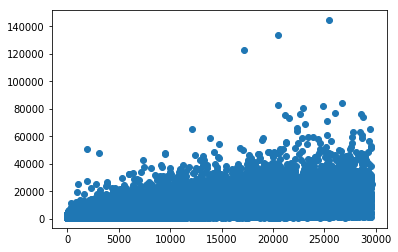

In [21]:
plt.scatter(actual, predicted)
plt.show()

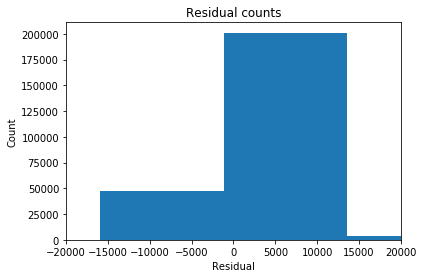

In [24]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.xlim(-20000, 20000)
plt.show()

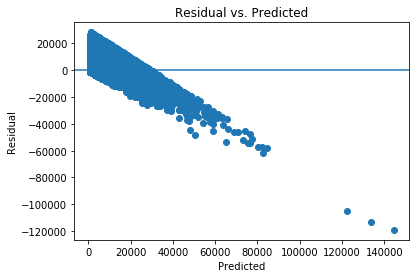

In [25]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [26]:
correlation_matrix = X_train.corr()
display(correlation_matrix)

,goal,state,backers
goal,1.000,-0.025,-0.012
state,-0.025,1.000,0.447
backers,-0.012,0.447,1.000


In [27]:
linear_formula = 'kickstarter_data.pledged ~ goal + state + backers'
lm = smf.ols(formula= linear_formula, data=kickstarter_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     kickstarter_data.pledged   R-squared:                       0.515
Model:                                  OLS   Adj. R-squared:                  0.515
Method:                       Least Squares   F-statistic:                 1.338e+05
Date:                      Wed, 06 Jun 2018   Prob (F-statistic):               0.00
Time:                              17:42:58   Log-Likelihood:            -4.7431e+06
No. Observations:                    378661   AIC:                         9.486e+06
Df Residuals:                        378657   BIC:                         9.486e+06
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    334.5663    134.869      2.481      0.013      70.228     598.905
goal           0.0004   9.15e-05      4.382      0.000       0.000       0.001
state       3880.2504    228.447     16.985      0.000    3432.501    4328.000
backers       75.3288      0.120    625.812      0.000      75.093      75.565
==============================================================================
Omnibus:                  1320684.513   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2116617159425.559
Skew:                          66.606   Prob(JB):                         0.00
Kurtosis:                   11584.712   Cond. No.                     2.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
score = cross_val_score(regr, X, y, cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score = cross_val_score(regr, X_train, y_train, cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score = cross_val_score(regr, X_test, y_test, cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.56 (+/- 0.04)
Unweighted Accuracy: 0.56 (+/- 0.03)
Unweighted Accuracy: 0.55 (+/- 0.04)


The linear regression model shows around rsquared for train and test. However 6-15 Ks all have around 79% accuracy without the weights had very similar accuracies at 19 Ks. The knn model performed much better with or without the weights than linear regression. 